# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [59]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi.newsapi_client import NewsApiClient
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\racon\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [60]:
# Read your api key environment variable
# YOUR CODE HERE!
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")
newsapi = NewsApiClient(api_key=api_key)

In [61]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
btc_evt = newsapi.get_everything(q='bitcoin', language="en")
btc_evt["articles"][0]

{'source': {'id': None, 'name': 'Lifehacker.com'},
 'author': 'David Murphy',
 'title': 'What You Need to Know About Buying Cryptocurrency on PayPal',
 'description': 'Whether you’re looking to make a larger investment or you just want to dabble in cryptocurrencies, you can purchase Bitcoin, Ethereum, Bitcoin Cash, and Litecoin through PayPal. And, soon, you’ll be able to pay various merchants using your cryptocurrency stas…',
 'url': 'https://lifehacker.com/what-you-need-to-know-about-buying-cryptocurrency-on-pa-1846585705',
 'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/qvc2foo4ufow1cbsuk9f.jpg',
 'publishedAt': '2021-03-31T14:00:00Z',
 'content': 'Whether youre looking to make a larger investment or you just want to dabble in cryptocurrencies, you can purchase Bitcoin, Ethereum, Bitcoin Cash, and Litecoin through PayPal. And, soon, youll be ab… [+3818 chars]'}

In [62]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
eth_evt = newsapi.get_everything(q="Ethereum", language="en")
eth_evt["articles"][0]

{'source': {'id': 'the-verge', 'name': 'The Verge'},
 'author': 'Adi Robertson',
 'title': 'India will reportedly introduce bill to make owning cryptocurrency illegal',
 'description': 'India’s legislature is reportedly considering a near-total ban on private cryptocurrencies like Bitcoin or Ethereum, including owning the virtual currency. The government has discussed plans for a national digital currency as an alternative.',
 'url': 'https://www.theverge.com/2021/3/15/22332677/india-cryptocurrency-trading-mining-possession-ban-law-report',
 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/IdgNJaOIQBsN8QbQcH2MDU6sAUA=/0x243:2040x1311/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/10432811/mdoying_180308_2373_0091still.jpg',
 'publishedAt': '2021-03-15T22:25:02Z',
 'content': 'One of the strictest crackdowns worldwide\r\nPhoto by Michele Doying / The Verge\r\nIndia is reportedly moving forward with a sweeping ban on cryptocurrencies. According to Reuters, the countrys legislat…

In [63]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
btc_sentiments = []

for article in btc_evt["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]
btc_df.head()

,date,text,compound,positive,negative,neutral
0,2021-03-31,Whether youre looking to make a larger investm...,0.0772,0.039,0.0,0.961
1,2021-03-24,"As it promised earlier this year, Tesla now ac...",0.5859,0.127,0.0,0.873
2,2021-04-13,The crypto industry as a whole has seen a mome...,0.6124,0.135,0.0,0.865
3,2021-03-24,The inevitable has happened: You can now purch...,0.3182,0.065,0.0,0.935
4,2021-03-24,Tesla made headlines earlier this year when it...,0.2023,0.050,0.0,0.950


In [64]:
# Create the ethereum sentiment scores DataFrame
# YOUR CODE HERE!
eth_sentiments = []

for article in eth_evt["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]
eth_df.head()

,date,text,compound,positive,negative,neutral
0,2021-03-15,One of the strictest crackdowns worldwide\r\nP...,-0.5574,0.000,0.11,0.890
1,2021-03-31,Whether youre looking to make a larger investm...,0.0772,0.039,0.00,0.961
2,2021-03-15,Famed auction house Christies just sold its fi...,0.0000,0.000,0.00,1.000
3,2021-03-29,Payment card network Visa has announced that t...,0.0000,0.000,0.00,1.000
4,2021-04-13,"ConsenSys, a key player in crypto and a major ...",0.2732,0.062,0.00,0.938


In [65]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.236610,0.080350,0.028250,0.891400
std,0.373060,0.066469,0.047327,0.079059
min,-0.557400,0.000000,0.000000,0.709000
25%,0.038700,0.047250,0.000000,0.863250
50%,0.318200,0.066500,0.000000,0.911000
75%,0.432825,0.103750,0.054500,0.936250
max,0.771700,0.240000,0.142000,1.000000


In [66]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.00000
mean,0.023990,0.036550,0.033500,0.93000
std,0.294225,0.049016,0.041179,0.07114
min,-0.557400,0.000000,0.000000,0.73500
25%,-0.115300,0.000000,0.000000,0.91475
50%,0.000000,0.000000,0.000000,0.93700
75%,0.126200,0.065000,0.071000,1.00000
max,0.565000,0.172000,0.110000,1.00000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin's 0.07 score is higher than Etherium's 0.04

Q: Which coin had the highest compound score?

A: BTC

Q. Which coin had the highest positive score?

A: BTC

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [67]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [68]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!
def clean_text(article):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    
    re_clean = regex.sub('', article)
    words = word_tokenize(re_clean)
    output = [word.lower() for word in words if word.lower() not in sw]
    return output

btc_text = pd.Series(btc_evt["articles"], dtype="string").to_string()
eth_text = pd.Series(eth_evt["articles"], dtype="string").to_string()
btc_clean = clean_text(btc_text)
eth_clean = clean_text(eth_text)
print (btc_clean)

['source', 'id', 'none', 'name', 'lifehackerco', 'source', 'id', 'engadget', 'name', 'engadge', 'source', 'id', 'techcrunch', 'name', 'techc', 'source', 'id', 'mashable', 'name', 'mashabl', 'source', 'id', 'techcrunch', 'name', 'techc', 'source', 'id', 'none', 'name', 'lifehackerco', 'source', 'id', 'theverge', 'name', 'source', 'id', 'mashable', 'name', 'mashabl', 'source', 'id', 'none', 'name', 'lifehackerco', 'source', 'id', 'techcrunch', 'name', 'techc', 'source', 'id', 'none', 'name', 'gizmodocom', 'source', 'id', 'techcrunch', 'name', 'techc', 'source', 'id', 'reuters', 'name', 'reuters', 'source', 'id', 'techcrunch', 'name', 'techc', 'source', 'id', 'reuters', 'name', 'reuters', 'source', 'id', 'engadget', 'name', 'engadge', 'source', 'id', 'none', 'name', 'entrepreneur', 'source', 'id', 'none', 'name', 'slashdotorg', 'source', 'id', 'reuters', 'name', 'reuters', 'source', 'id', 'reuters', 'name', 'reuters']


In [69]:
# Create a new tokens column for bitcoin
# YOUR CODE HERE!
articles_btc = btc_df['text']
btc_df['tokens'] = [clean_text(article) for article in articles_btc]
btc_df

,date,text,compound,positive,negative,neutral,tokens
0,2021-03-31,Whether youre looking to make a larger investm...,0.0772,0.039,0.000,0.961,"[whether, youre, looking, make, larger, invest..."
1,2021-03-24,"As it promised earlier this year, Tesla now ac...",0.5859,0.127,0.000,0.873,"[promised, earlier, year, tesla, accepts, paym..."
2,2021-04-13,The crypto industry as a whole has seen a mome...,0.6124,0.135,0.000,0.865,"[crypto, industry, whole, seen, momentous, yea..."
3,2021-03-24,The inevitable has happened: You can now purch...,0.3182,0.065,0.000,0.935,"[inevitable, happened, purchase, tesla, vehicl..."
4,2021-03-24,Tesla made headlines earlier this year when it...,0.2023,0.050,0.000,0.950,"[tesla, made, headlines, earlier, year, took, ..."
5,2021-03-31,National Burrito Day lands on April Fools Day ...,0.6075,0.178,0.102,0.719,"[national, burrito, day, lands, april, fools, ..."
6,2021-03-15,One of the strictest crackdowns worldwide\r\nP...,-0.5574,0.000,0.110,0.890,"[one, strictest, crackdowns, worldwidephoto, m..."
7,2021-03-16,The hacker behind last years big Twitter hack\...,-0.5106,0.000,0.142,0.858,"[hacker, behind, last, years, big, twitter, ha..."
8,2021-03-29,It seems like everyone is making money off of ...,0.3612,0.067,0.000,0.933,"[seems, like, everyone, making, money, nfts, n..."
9,2021-03-25,Data centers and bitcoin mining operations are...,0.7717,0.240,0.051,0.709,"[data, centers, bitcoin, mining, operations, b..."


In [70]:
# Create a new tokens column for ethereum
# YOUR CODE HERE!
articles_eth = eth_df['text']
eth_df['tokens'] = [clean_text(article) for article in articles_eth]
eth_df


,date,text,compound,positive,negative,neutral,tokens
0,2021-03-15,One of the strictest crackdowns worldwide\r\nP...,-0.5574,0.000,0.110,0.890,"[one, strictest, crackdowns, worldwidephoto, m..."
1,2021-03-31,Whether youre looking to make a larger investm...,0.0772,0.039,0.000,0.961,"[whether, youre, looking, make, larger, invest..."
2,2021-03-15,Famed auction house Christies just sold its fi...,0.0000,0.000,0.000,1.000,"[famed, auction, house, christies, sold, first..."
3,2021-03-29,Payment card network Visa has announced that t...,0.0000,0.000,0.000,1.000,"[payment, card, network, visa, announced, tran..."
4,2021-04-13,"ConsenSys, a key player in crypto and a major ...",0.2732,0.062,0.000,0.938,"[consensys, key, player, crypto, major, propon..."
5,2021-03-23,"Move fast, break things, get hacked.\r\nThat’s...",-0.4019,0.000,0.080,0.920,"[move, fast, break, things, get, hackedthats, ..."
6,2021-03-30,The NFT craze has been an intriguing moment fo...,0.5650,0.172,0.093,0.735,"[nft, craze, intriguing, moment, digital, arti..."
7,2021-03-16,Here's everything you need to know about non-f...,-0.1531,0.000,0.062,0.938,"[heres, everything, need, know, nonfungible, t..."
8,2021-03-18,OpenSea has been one of a handful of NFT marke...,0.4767,0.084,0.000,0.916,"[opensea, one, handful, nft, marketplaces, exp..."
9,2021-03-17,"MetaMask, one of the most popular web wallets ...",0.4754,0.083,0.000,0.917,"[metamask, one, popular, web, wallets, cryptoc..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [71]:
from collections import Counter
from nltk import ngrams
word_counts_btc = Counter(btc_clean)
word_counts_eth = Counter(eth_clean)

In [72]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
bigram_counts_btc = Counter(ngrams(word_counts_btc, n=2))
print(dict(bigram_counts_btc))


{('source', 'id'): 1, ('id', 'none'): 1, ('none', 'name'): 1, ('name', 'lifehackerco'): 1, ('lifehackerco', 'engadget'): 1, ('engadget', 'engadge'): 1, ('engadge', 'techcrunch'): 1, ('techcrunch', 'techc'): 1, ('techc', 'mashable'): 1, ('mashable', 'mashabl'): 1, ('mashabl', 'theverge'): 1, ('theverge', 'gizmodocom'): 1, ('gizmodocom', 'reuters'): 1, ('reuters', 'entrepreneur'): 1, ('entrepreneur', 'slashdotorg'): 1}


In [73]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
bigram_counts_eth = Counter(ngrams(word_counts_eth, n=2))
print(dict(bigram_counts_eth))

{('source', 'id'): 1, ('id', 'theverge'): 1, ('theverge', 'name'): 1, ('name', 'none'): 1, ('none', 'lifehackerco'): 1, ('lifehackerco', 'techcrunch'): 1, ('techcrunch', 'techc'): 1, ('techc', 'mashable'): 1, ('mashable', 'mashabl'): 1, ('mashabl', 'entrepreneur'): 1, ('entrepreneur', 'engadget'): 1, ('engadget', 'engadge'): 1, ('engadge', 'businessinsider'): 1, ('businessinsider', 'gizmodocom'): 1}


In [74]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [75]:
# Get the top 10 words for Bitcoin
# YOUR CODE HERE!
token_count(bigram_counts_btc, N=10)

[(('source', 'id'), 1),
 (('id', 'none'), 1),
 (('none', 'name'), 1),
 (('name', 'lifehackerco'), 1),
 (('lifehackerco', 'engadget'), 1),
 (('engadget', 'engadge'), 1),
 (('engadge', 'techcrunch'), 1),
 (('techcrunch', 'techc'), 1),
 (('techc', 'mashable'), 1),
 (('mashable', 'mashabl'), 1)]

In [76]:
# Get the top 10 words for Ethereum
# YOUR CODE HERE!
token_count(bigram_counts_eth, N=10)

[(('source', 'id'), 1),
 (('id', 'theverge'), 1),
 (('theverge', 'name'), 1),
 (('name', 'none'), 1),
 (('none', 'lifehackerco'), 1),
 (('lifehackerco', 'techcrunch'), 1),
 (('techcrunch', 'techc'), 1),
 (('techc', 'mashable'), 1),
 (('mashable', 'mashabl'), 1),
 (('mashabl', 'entrepreneur'), 1)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [77]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

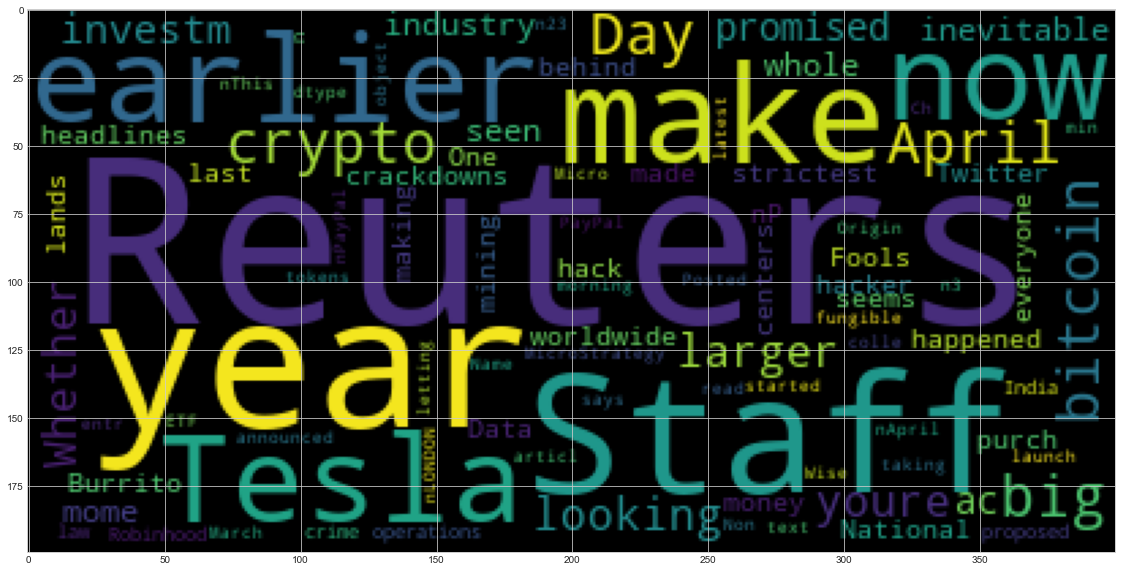

In [78]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
wc = WordCloud()
img = wc.generate(str(articles_btc))
plt.imshow(img)

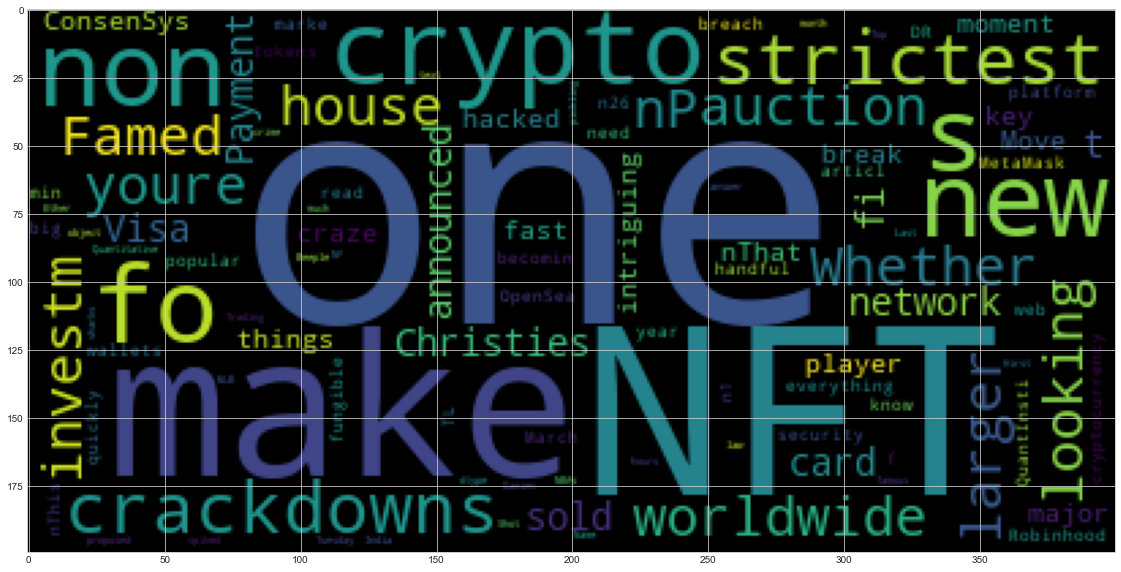

In [79]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
img = wc.generate(str(articles_eth))
plt.imshow(img)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [80]:
import spacy
from spacy import displacy

In [81]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [82]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [83]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc_btc = nlp(str(articles_btc))
displacy.render(doc_btc, style='ent')

In [84]:
# List all Entities
# YOUR CODE HERE!
entities = [ent.text for ent in doc_btc.ents if ent.label_ in ['GPE', 'ORG']]
entities = [i.lower().replace(' ', '_') for i in entities]
print(entities)

['india', 'reuters', 'reuters', 'reuters', '\\r\\npaypal', 'reuters', 'reuters']


---

## Ethereum NER

In [85]:
# Concatenate all of the ethereum text together
# YOUR CODE HERE!
doc_eth = nlp(str(articles_eth))
displacy.render(doc_eth, style='ent')

In [86]:
# List all Entities
# YOUR CODE HERE!
entities = [ent.text for ent in doc.ents if ent.label_ in ['GPE', 'ORG']]
entities = [i.lower().replace(' ', '_') for i in entities]
print(entities)

['christies', 'visa', 'consensys', 'nft', 'nft', 'beeple’s_$', 'mlb', 'india']
